In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from fbprophet import Prophet

In [9]:
def custom_breusch_godfrey(cmp_df, lag):
    bgm = sm.OLS(cmp_df[lag:]['e'].to_numpy(), sm.add_constant(cmp_df[:-lag]['e'].to_numpy()))
    bgm_res = bgm.fit()
    print(bgm_res.summary())
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(cmp_df[:-lag]['e'].to_numpy(), bgm_res.fittedvalues, label="Регрессия по остаткам")
    ax.plot(cmp_df[:-lag]['e'].to_numpy(), cmp_df[lag:]['e'].to_numpy(), 'o', label="Остатки")
    ax.legend(loc='best')

In [10]:
# import dataframe
df = pd.read_csv('DataFinal1.csv', sep=";", decimal=".")
COLUMN_NAME = 'Средняя цена авокадо в США (в долларах)'
N_COLUMNS = len(df.columns)
N_ROWS = len(df.index)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Дата,Средняя цена авокадо в США (в долларах),Общее количество проданных авокадо (в фунтах),"Количество запросов ""Здоровая еда"""
0,31.01.2015,1.365046,318085209.6,70.50
1,28.02.2015,1.326944,362637599.2,63.25
2,31.03.2015,1.361981,418583069.8,63.40
3,30.04.2015,1.383449,344144395.2,63.75
4,31.05.2015,1.344685,483784044.8,62.40
5,30.06.2015,1.399074,381826743.7,58.00
6,31.07.2015,1.409444,356701872.6,60.50
7,31.08.2015,1.444481,419244814.8,55.40
8,30.09.2015,1.449144,329218833.1,57.75
9,31.10.2015,1.391968,305776111.0,59.00


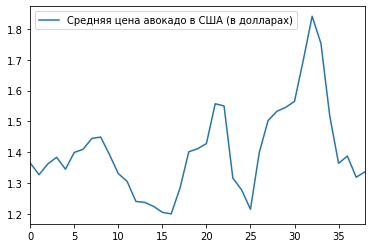

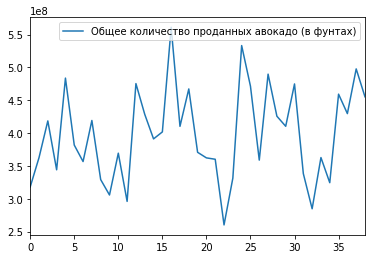

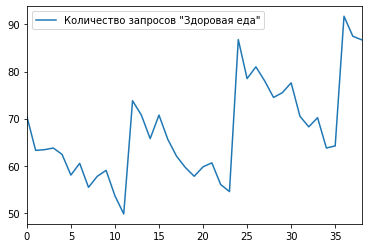

In [11]:
df.plot(y = 'Средняя цена авокадо в США (в долларах)')
df.plot(y = 'Общее количество проданных авокадо (в фунтах)')
df.plot(y = 'Количество запросов "Здоровая еда"')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


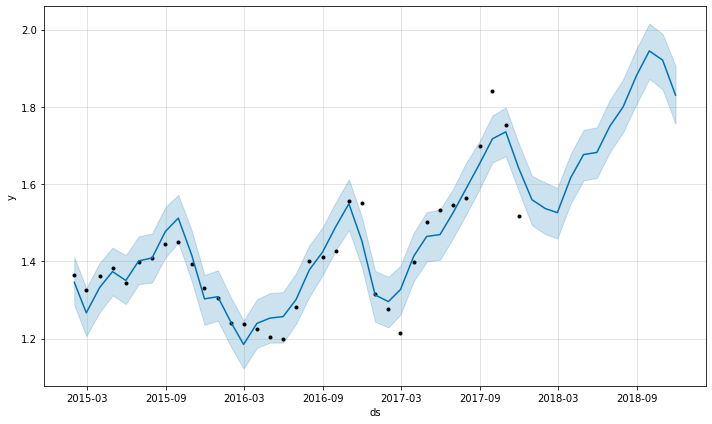

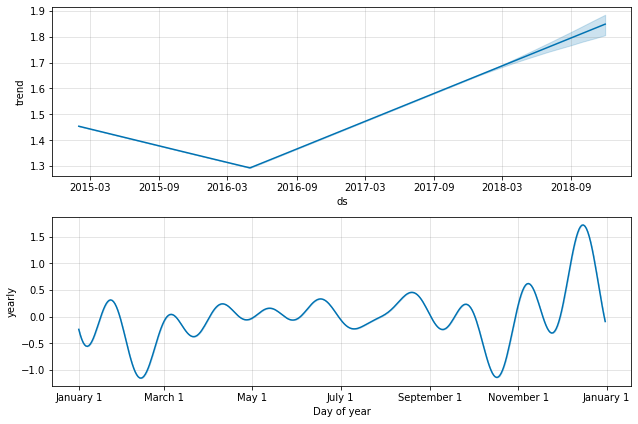

In [12]:
train_df = df[[COLUMN_NAME, 'Дата']].copy()
train_df['y'] = train_df[COLUMN_NAME]
train_df['ds'] = train_df['Дата']
train_df = train_df[:-4]
m = Prophet()
m.fit(train_df)

future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig1 = m.plot(fcst)
fig2 = m.plot_components(fcst)

Для всех наблюдений:
MAPE 3.881661637941361
MAE 0.0541208253081531
R^2 0.8404432159207601

Для тестовых значений:
MAPE 15.43841538365607
MAE 0.20798286966136464
R^2 -0.15787945551413216
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     36.55
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.04e-07
Time:                        11:15:05   Log-Likelihood:                 54.905
No. Observations:                  38   AIC:                            -105.8
Df Residuals:                      36   BIC:                            -102.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef   

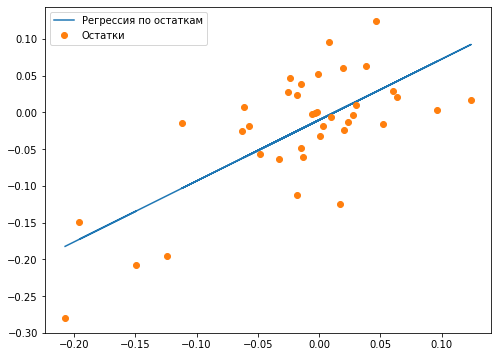

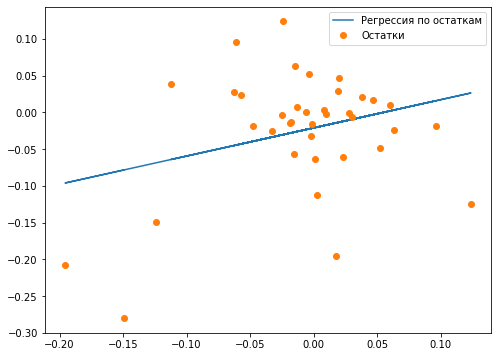

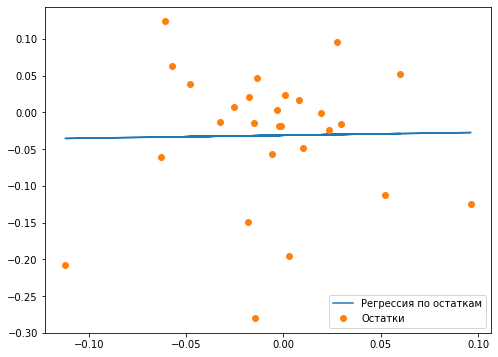

In [13]:
def show_forecast(cmp_df, num_predictions, num_values, axtitle):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines',
        marker=dict(color="olive"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        marker=dict(color="olive"),
        line=dict(width=0),
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title=axtitle),
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

df_vis = df[[COLUMN_NAME, 'Дата']].copy()
df_vis['y'] = df_vis[COLUMN_NAME]
df_vis['ds'] = df_vis['Дата']        
cmp_df = fcst.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df_vis.set_index('ds'))    
show_forecast(cmp_df, 50, 50, COLUMN_NAME)
    
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y'] 
print ('Для всех наблюдений:')
print ('MAPE', np.mean(abs(cmp_df[:-8]['p'])))
print ('MAE', np.mean(abs(cmp_df[:-8]['e'])))
print ('R^2', (np.corrcoef(cmp_df[:-8]['y'], cmp_df[:-8]['yhat'])[0,1]))
print ('\nДля тестовых значений:')
print ('MAPE', np.mean(abs(cmp_df[:-8][-4:]['p'])))
print ('MAE', np.mean(abs(cmp_df[:-8][-4:]['e'])))
print ('R^2', (np.corrcoef(cmp_df[:-8][-4:]['y'], cmp_df[:-8][-4:]['yhat'])[0,1]))
custom_breusch_godfrey(cmp_df[:-8],1)
custom_breusch_godfrey(cmp_df[:-8],2)
custom_breusch_godfrey(cmp_df[:-8],12)

In [14]:
def adf_test(timeseries, lag):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, maxlag=lag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

train_df = df[COLUMN_NAME].copy()
adf_test(train_df, 12)

Results of Dickey-Fuller Test:
Test Statistic                 -2.986463
p-value                         0.036178
#Lags Used                      1.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                 -4.381881
p-value                         0.000320
#Lags Used                      1.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


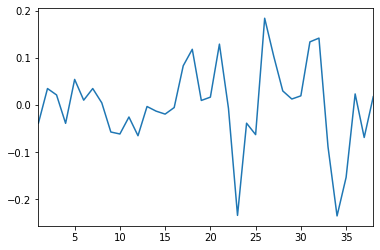

In [15]:
train_df1diff = train_df.diff(1)
train_df1diff = train_df1diff.dropna()
adf_test(train_df1diff, 12)
train_df1diff.plot()

Results of Dickey-Fuller Test:
Test Statistic                 -5.122591
p-value                         0.000013
#Lags Used                      1.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


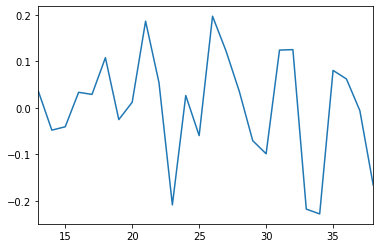

In [16]:
train_df1diff = train_df1diff.diff(12)
train_df1diff = train_df1diff.dropna()
adf_test(train_df1diff, 1)
train_df1diff.plot()

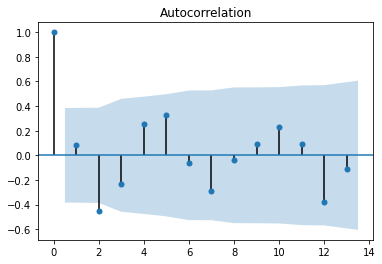

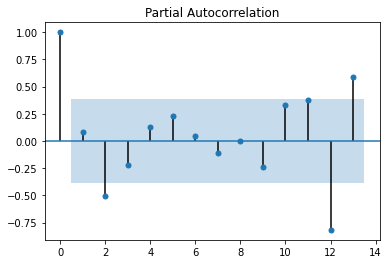

In [17]:
fig1 = sm.graphics.tsa.plot_acf(train_df1diff.values.squeeze(), lags=13)
fig2 = sm.graphics.tsa.plot_pacf(train_df1diff, lags=13)

In [18]:
model = SARIMAX(train_df, order=(2,1,2), seasonal_order=(1,0,1,12)).fit()
print(model.summary())

D:\ImportantThings\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                      Statespace Model Results                                     
Dep. Variable:     Средняя цена авокадо в США (в долларах)   No. Observations:                   39
Model:                      SARIMAX(2, 1, 2)x(1, 0, 1, 12)   Log Likelihood                  44.401
Date:                                     Sun, 26 Apr 2020   AIC                            -74.802
Time:                                             11:15:07   BIC                            -63.339
Sample:                                                  0   HQIC                           -70.724
                                                      - 39                                         
Covariance Type:                                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8875      0.462      1.92

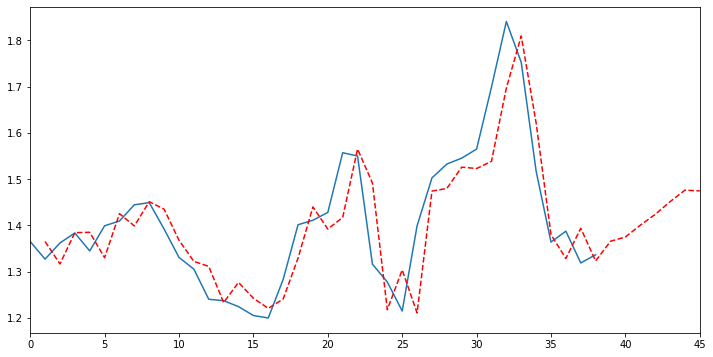

In [19]:
pred = model.predict(1, 45)
df[COLUMN_NAME].plot(figsize=(12,6))
pred.plot(style='r--')

In [20]:
cmp_df2 = pd.DataFrame()
cmp_df2['yhat'] = pred[:-7]
cmp_df2['y'] = df[COLUMN_NAME].copy()
cmp_df2['e'] = cmp_df2['y'] - cmp_df2['yhat']
cmp_df2['p'] = 100*cmp_df2['e']/cmp_df2['y']    
print ('MAPE', np.mean(abs(cmp_df2['p'])))
print ('MAE', np.mean(abs(cmp_df2['e'])))
print ('R^2', (np.corrcoef(cmp_df2['y'], cmp_df2['yhat'])[0,1]))

MAPE 3.9880852769365776
MAE 0.05681382688813986
R^2 0.8653533439608154


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                 0.0002013
Date:                Sun, 26 Apr 2020   Prob (F-statistic):              0.989
Time:                        11:15:07   Log-Likelihood:                 43.732
No. Observations:                  37   AIC:                            -83.46
Df Residuals:                      35   BIC:                            -80.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.013      0.695      0.4

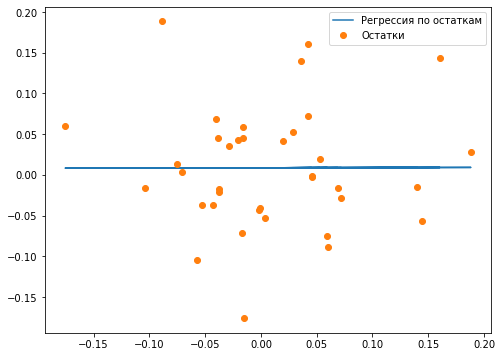

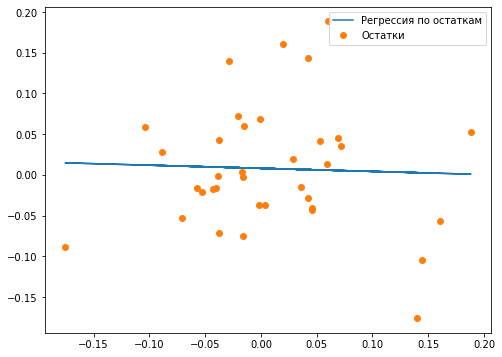

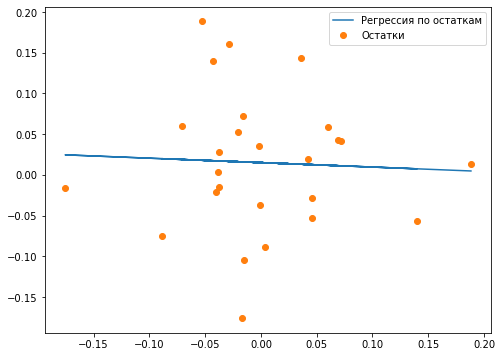

In [21]:
custom_breusch_godfrey(cmp_df2,1)
custom_breusch_godfrey(cmp_df2,2)
custom_breusch_godfrey(cmp_df2,12)